In [1]:
import os
import cv2
import numpy as np 
import tensorflow as tf
positives = os.listdir('Dataset/'+os.listdir('Dataset')[0])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 416, 416, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 416, 416, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 416, 416, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [2]:
print(len(positives))

1000


In [3]:
print(positives)

['NV_1.mp4', 'NV_10.mp4', 'NV_100.mp4', 'NV_1000.mp4', 'NV_101.mp4', 'NV_102.mp4', 'NV_103.mp4', 'NV_104.mp4', 'NV_105.mp4', 'NV_106.mp4', 'NV_107.mp4', 'NV_108.mp4', 'NV_109.mp4', 'NV_11.mp4', 'NV_110.mp4', 'NV_111.mp4', 'NV_112.mp4', 'NV_113.mp4', 'NV_114.mp4', 'NV_115.mp4', 'NV_116.mp4', 'NV_117.mp4', 'NV_118.mp4', 'NV_119.mp4', 'NV_12.mp4', 'NV_120.mp4', 'NV_121.mp4', 'NV_122.mp4', 'NV_123.mp4', 'NV_124.mp4', 'NV_125.mp4', 'NV_126.mp4', 'NV_127.mp4', 'NV_128.mp4', 'NV_129.mp4', 'NV_13.mp4', 'NV_130.mp4', 'NV_131.mp4', 'NV_132.mp4', 'NV_133.mp4', 'NV_134.mp4', 'NV_135.mp4', 'NV_136.mp4', 'NV_137.mp4', 'NV_138.mp4', 'NV_139.mp4', 'NV_14.mp4', 'NV_140.mp4', 'NV_141.mp4', 'NV_142.mp4', 'NV_143.mp4', 'NV_144.mp4', 'NV_145.mp4', 'NV_146.mp4', 'NV_147.mp4', 'NV_148.mp4', 'NV_149.mp4', 'NV_15.mp4', 'NV_150.mp4', 'NV_151.mp4', 'NV_152.mp4', 'NV_153.mp4', 'NV_154.mp4', 'NV_155.mp4', 'NV_156.mp4', 'NV_157.mp4', 'NV_158.mp4', 'NV_159.mp4', 'NV_16.mp4', 'NV_160.mp4', 'NV_161.mp4', 'NV_162.mp4',

In [4]:
def displayVideo(index,violence=1):
    
    path=""
    if(violence==1):
        video = os.listdir('Dataset/Violence')[index]
        path=os.path.join('Dataset/Violence/',video)
    else:
        video = os.listdir('Dataset/NonViolence')[index]
        path = os.path.join('Dataset/NonViolence/', video)
    vid=cv2.VideoCapture(path)
    if (vid.isOpened() == False):
         print("Error opening video stream or file")
    while(vid.isOpened()):
        ret, frame = vid.read()
        if ret == True:
            cv2.imshow('Frame',frame)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        else: 
            break
    vid.release()
    
    


In [5]:
def getInfo(index, violence=1):

    path = ""
    if(violence == 1):
        video = os.listdir('Dataset/Violence')[index]
        path = os.path.join('Dataset/Violence/', video)
    else:
        video = os.listdir('Dataset/NonViolence')[index]
        path = os.path.join('Dataset/NonViolence/', video)
    vid = cv2.VideoCapture(path)
    frames = vid.get(cv2.CAP_PROP_FRAME_COUNT)
    fps = vid.get(cv2.CAP_PROP_FPS)
    return (frames,fps,frames/fps)


In [6]:
minframes=10000
maxframes=0
for i in range(1000):
    nframes=getInfo(i,0)[0]
    if nframes>maxframes:
        maxframes=nframes
    if nframes<minframes:
        minframes=nframes
print(maxframes,minframes)

5397.0 29.0


In [7]:
path = ""
i=100
video = os.listdir('Dataset/Violence')[i]
path = os.path.join('Dataset/Violence/', video)
vid = cv2.VideoCapture(path)
nframes = vid.get(cv2.CAP_PROP_FRAME_COUNT)
step=nframes//30
j=0
for k in range(0,30):
    vid.set(cv2.CAP_PROP_POS_FRAMES, j)
    ret, frame = vid.read()
    cv2.imwrite('testing/img'+str(k)+'.jpg',frame)
    j+=step



In [8]:
def createDataset(start,end,Tx,fsize):
    Y=[]
    X=[]
    for i in range(start,end+1):
        vpath = ""
        nvpath=""
        vvideo = os.listdir('Dataset/Violence')[i]
        vpath = os.path.join('Dataset/Violence/', vvideo)
        nvvideo = os.listdir('Dataset/NonViolence')[i]
        nvpath = os.path.join('Dataset/NonViolence/', nvvideo)
        vid = cv2.VideoCapture(vpath)
        nframes  = vid.get(cv2.CAP_PROP_FRAME_COUNT)
        if(nframes>=Tx):
            step = 1
            j = 0
            frames=[]
            for k in range(0, Tx):
                vid.set(cv2.CAP_PROP_POS_FRAMES, j)
                ret, frame = vid.read()
                frame=cv2.resize(frame,(fsize,fsize))
                frame=np.divide(frame,255.0)
                j += step
                frames.append(np.array(frame,dtype=np.float32))
            X.append(np.array([frames]))
            Y.append(1)
            print('Added Violence:'+str(i))
        
        vid = cv2.VideoCapture(nvpath)
        nframes = vid.get(cv2.CAP_PROP_FRAME_COUNT)
        if nframes>=Tx:
            step = 1
            j = 0
            frames = []
            for k in range(0, Tx):
                vid.set(cv2.CAP_PROP_POS_FRAMES, j)
                ret, frame = vid.read()
                frame = cv2.resize(frame, (fsize, fsize))
                frame = np.divide(frame, 255.0)
                j += step
                frames.append(np.array(frame,dtype=np.float32))
            X.append(np.array([frames]))
            Y.append(0)
            print('Added Non Violence:'+str(i))
    X=np.array(X,dtype=np.float32)
    Y = np.asarray(Y).astype('float32').reshape((-1, 1))
    return X,Y
        
        





In [9]:
X,Y=createDataset(0,250,60,128)


Added Violence:0
Added Non Violence:0
Added Violence:1
Added Non Violence:1
Added Violence:2
Added Non Violence:2
Added Violence:3
Added Non Violence:3
Added Violence:4
Added Non Violence:4
Added Violence:5
Added Non Violence:5
Added Violence:6
Added Non Violence:6
Added Violence:7
Added Non Violence:7
Added Violence:8
Added Non Violence:8
Added Violence:9
Added Non Violence:9
Added Violence:10
Added Non Violence:10
Added Violence:11
Added Non Violence:11
Added Violence:12
Added Non Violence:12
Added Violence:13
Added Non Violence:13
Added Violence:14
Added Non Violence:14
Added Violence:15
Added Non Violence:15
Added Violence:16
Added Non Violence:16
Added Violence:17
Added Non Violence:17
Added Violence:18
Added Non Violence:18
Added Violence:19
Added Non Violence:19
Added Violence:20
Added Non Violence:20
Added Violence:21
Added Non Violence:21
Added Violence:22
Added Non Violence:22
Added Violence:23
Added Non Violence:23
Added Violence:24
Added Non Violence:24
Added Violence:25
Ad

In [10]:
print((X[23].shape))

(1, 60, 128, 128, 3)


In [11]:
import tensorflow as tf

In [12]:
dataset = tf.data.Dataset.from_tensor_slices((X, Y))



In [13]:
dslen=dataset.cardinality().numpy()
print(dslen)

501


In [17]:
import pickle
tf_data_path='datafile'
tf.data.experimental.save(
    dataset, tf_data_path, compression='GZIP'
)
# also save the element_spec to disk for future loading
with open(tf_data_path + '/element_spec', 'wb') as out_:
    pickle.dump(dataset.element_spec, out_)


In [24]:
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    assert (train_split + test_split + val_split) == 1

    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [32]:
train,val,test=get_dataset_partitions_tf(dataset,dslen)

In [35]:
model=tf.keras.models.load_model('model.h5')

In [36]:
history=model.fit(train,batch_size=32,steps_per_epoch=32,epochs=10)

Epoch 1/10
32/32 [==============================] - 35s 938ms/step - loss: 0.4620 - accuracy: 0.8438
Epoch 2/10
32/32 [==============================] - 32s 985ms/step - loss: 0.5478 - accuracy: 0.7500
Epoch 3/10
32/32 [==============================] - 30s 923ms/step - loss: 0.5330 - accuracy: 0.7188
Epoch 4/10
32/32 [==============================] - 28s 867ms/step - loss: 0.5038 - accuracy: 0.8438
Epoch 5/10
32/32 [==============================] - 27s 854ms/step - loss: 0.4463 - accuracy: 0.8438
Epoch 6/10
32/32 [==============================] - 25s 771ms/step - loss: 0.4019 - accuracy: 0.8438
Epoch 7/10
32/32 [==============================] - 24s 752ms/step - loss: 0.5236 - accuracy: 0.7188
Epoch 8/10
32/32 [==============================] - 23s 711ms/step - loss: 0.4678 - accuracy: 0.7188
Epoch 9/10
32/32 [==============================] - 22s 677ms/step - loss: 0.3073 - accuracy: 0.9375
Epoch 10/10
32/32 [==============================] - 22s 700ms/step - loss: 0.2797 - accura

In [41]:
import matplotlib.pyplot as plt

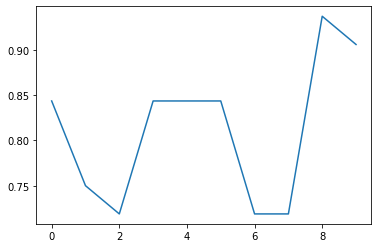

In [50]:
plt.plot(history['accuracy'])


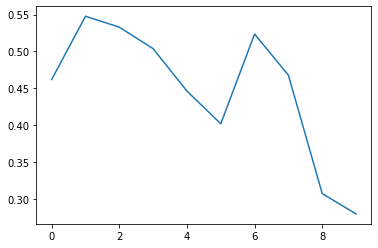

In [51]:
plt.plot(history['loss'])

In [52]:
model.evaluate(test,batch_size=32)

51/51 [==============================] - 69s 622ms/step - loss: 0.2461 - accuracy: 0.9608


[0.24610503017902374, 0.9607843160629272]

In [34]:
model.save('model.h5')

In [54]:
def extractFrames(vid,Tx=60,fsize=128):
    nframes = vid.get(cv2.CAP_PROP_FRAME_COUNT)
    if nframes >= Tx:
        step = 1
        j = 0
        frames = []
        for k in range(0, Tx):
            vid.set(cv2.CAP_PROP_POS_FRAMES, j)
            ret, frame = vid.read()
            frame = cv2.resize(frame, (fsize, fsize))
            frame = np.divide(frame, 255.0)
            j += step
            frames.append(np.array(frame, dtype=np.float32))
        return np.array([frames])


In [55]:
def validate(model,index,violence=1):
    path = ""
    if(violence == 1):
        video = os.listdir('Dataset/Violence')[index]
        path = os.path.join('Dataset/Violence/', video)
    else:
        video = os.listdir('Dataset/NonViolence')[index]
        path = os.path.join('Dataset/NonViolence/', video)
    
    vid=cv2.VideoCapture(path)
    frames=extractFrames(vid)
    return model(frames)
    


In [60]:
model.evaluate(val,batch_size=32)

50/50 [==============================] - 60s 594ms/step - loss: 0.2057 - accuracy: 0.9800


[0.20567937195301056, 0.9800000190734863]

[1 2]
